In [65]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [9, 6]

# %matplotlib notebook


import sys
sys.path.append("../incl/")


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [66]:



import os
path = '/home/agluedge/Preprints/ELPH/data/run2_poly_features_rdim/data/'

filenames = []
# r=root, d=directories, f = filenames
for r, d, f in os.walk(path):
    for file in f:
        if 'rdim_' in file:
            filenames.append(os.path.join(r, file))

#for f in filenames:
    #print(f)

from natsort import realsorted
filenames = realsorted(filenames)


# ##print filenames
# for f in filenames:
#     print(f)
# nYdata = len(filenames)
# print(nYdata)
    
  
scans = [] # that data goes into this list
for fn in filenames:
  scans.append(np.loadtxt(fn)) #load linescan an append to the list of linescans - each linescan is matrix

scans = np.asarray(scans).T #create numpy ndarray from list -- contains all the data -- format [number of files, sweep steps, data column]
print (scans.shape)


rdimAr = np.arange(5,5+scans.shape[1]-0.5,1)

print(rdimAr.shape)



def get_fdim(rdim):
    return 1 + 2*rdim + 2*rdim * ( 2*rdim + 1) / 2


# fdimAr = 1 + 2*rdimAr + 2*rdimAr * ( 2*rdimAr + 1) / 2

fdimAr = get_fdim(rdimAr)

(6, 36)
(36,)


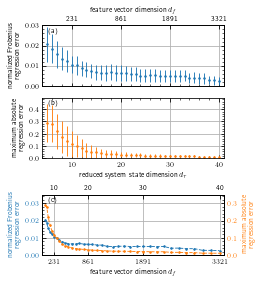

In [68]:

from matplotlib import rc
rc('text', usetex=True)

from matplotlib import gridspec
import matplotlib.ticker as ticker

fs = 7
fig = plt.figure(figsize=(3.5,3.8))
plt.rcParams.update({'font.size': fs})
gs = gridspec.GridSpec(nrows=4, ncols=1, width_ratios=[1], height_ratios=[1,1,0.2,1])


####################################################
####################################################
####################################################

ax00 = plt.subplot(gs[0,0])

plt.grid(0.5)

plt.errorbar(rdimAr, scans[0], yerr=scans[1], c='C0', ls='none', lw=0.9, marker='o', ms=1.5)

plt.xlim(4,41)
plt.ylim(0,0.03)


plt.ylabel('normalized Frobenius\nregression error')


    
ax00.xaxis.set_ticks_position('both')
ax00.yaxis.set_ticks_position('both')
ax00.tick_params(which='both', direction='in', color='k')

ax00.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax00.xaxis.set_minor_locator(ticker.MultipleLocator(2))
ax00.xaxis.set_major_formatter(ticker.NullFormatter())
ax00.xaxis.set_minor_formatter(ticker.NullFormatter())

ax00.yaxis.set_major_locator(ticker.MultipleLocator(0.01))
ax00.yaxis.set_minor_locator(ticker.MultipleLocator(0.002))
# ax00.yaxis.set_major_formatter(ticker.NullFormatter())
# ax00.yaxis.set_minor_formatter(ticker.NullFormatter())

plt.text(0.03, 0.97,r'(a)', horizontalalignment='left', verticalalignment='top', transform=ax00.transAxes)


ax_twiny = ax00.twiny()

plt.xlim(4,41)
ax_twiny.tick_params(which='both', direction='in', color='k')

ticks = [10,20,30,40]

ax_twiny.xaxis.set_major_locator(ticker.FixedLocator(ticks))
# ax_tx.xaxis.set_major_formatter(ticker.FixedFormatter([str(get_fdim(10)),'b','c','d']))
ax_twiny.xaxis.set_major_formatter(ticker.FixedFormatter(["{:.0f}".format(get_fdim(rdim)) for rdim in ticks]))

plt.xlabel('feature vector dimension $d_f$')

####################################################
####################################################
####################################################


ax00 = plt.subplot(gs[1,0])

plt.grid(0.5)

plt.errorbar(rdimAr, scans[2], yerr=scans[3], c='C1', ls='none', lw=0.9, marker='o', ms=1.5)

plt.xlim(4,41)
plt.ylim(0,0.49)


plt.ylabel('maximum absolute\nregression error')
plt.xlabel(r'reduced system state dimension $d_r$')



    
ax00.xaxis.set_ticks_position('both')
ax00.yaxis.set_ticks_position('both')
ax00.tick_params(which='both', direction='in', color='k')

ax00.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax00.xaxis.set_minor_locator(ticker.MultipleLocator(2))
# # ax00.xaxis.set_major_formatter(ticker.NullFormatter())
# # ax00.xaxis.set_minor_formatter(ticker.NullFormatter())

ax00.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax00.yaxis.set_minor_locator(ticker.MultipleLocator(0.02))
# ax00.yaxis.set_major_formatter(ticker.NullFormatter())
# ax00.yaxis.set_minor_formatter(ticker.NullFormatter())

plt.text(0.03, 0.97,r'(b)', horizontalalignment='left', verticalalignment='top', transform=ax00.transAxes)

####################################################
####################################################
####################################################


ax00 = plt.subplot(gs[3,0])

plt.grid(0.5)

plt.plot(fdimAr, scans[0], c='C0', ls='--', lw=0.9, marker='o', ms=1.5)


plt.ylim(0,0.035)

plt.xlim(10,3400)

plt.ylabel('normalized Frobenius\nregression error', c='C0')
plt.xlabel('feature vector dimension $d_f$')

    
ax00.xaxis.set_ticks_position('both')
ax00.yaxis.set_ticks_position('both')
ax00.tick_params(which='both', direction='in', color='k')

ax00.tick_params(axis='y', labelcolor='C0')

rticks = np.array([10,20,30,40])
fticks = get_fdim(rticks)

ax00.xaxis.set_major_locator(ticker.FixedLocator(fticks))

ax00.yaxis.set_major_locator(ticker.MultipleLocator(0.01))
ax00.yaxis.set_minor_locator(ticker.MultipleLocator(0.002))
# # ax00.yaxis.set_major_formatter(ticker.NullFormatter())
# # ax00.yaxis.set_minor_formatter(ticker.NullFormatter())

plt.text(0.03, 0.97,r'(c)', horizontalalignment='left', verticalalignment='top', transform=ax00.transAxes)


####################################################


ax_twinx = ax00.twinx()

ax_twinx.plot(fdimAr, scans[2], c='C1', ls='--', lw=0.9, marker='o', ms=1.5)

plt.ylim(0,0.35)


plt.ylabel('maximum absolute\nregression error', color='C1')

ax_twinx.tick_params(which='both', direction='in', color='k')

ax_twinx.tick_params(axis='y', labelcolor='C1')

ax_twinx.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax_twinx.yaxis.set_minor_locator(ticker.MultipleLocator(0.02))




ax_twiny = ax00.twiny()

plt.xlim(10,3400)
ax_twiny.tick_params(which='both', direction='in', color='k')

ax_twiny.xaxis.set_major_locator(ticker.FixedLocator(fticks))
ax_twiny.xaxis.set_major_formatter(ticker.FixedFormatter(["{:.0f}".format((rdim)) for rdim in rticks]))



####################################################
####################################################
####################################################


plt.tight_layout()

plt.subplots_adjust(left=0.15, bottom=0.08, right=0.87, top=0.92, wspace=0.05, hspace=0.25)

plt.savefig('/home/agluedge/Preprints/ELPH/figs/poly_rdim.pdf', dpi=600)
plt.show()



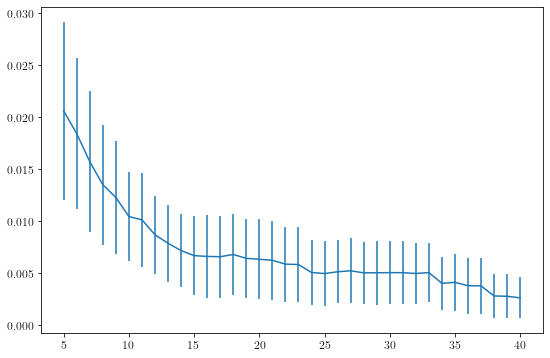

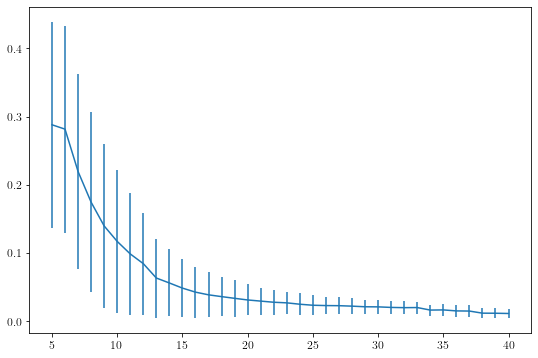

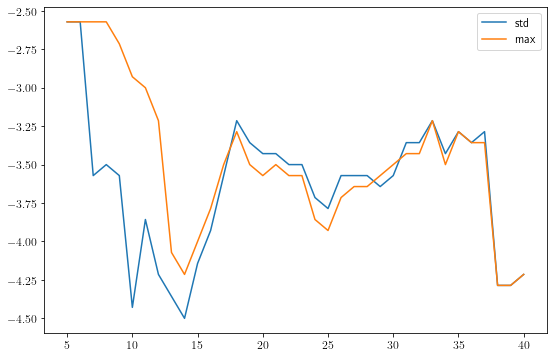

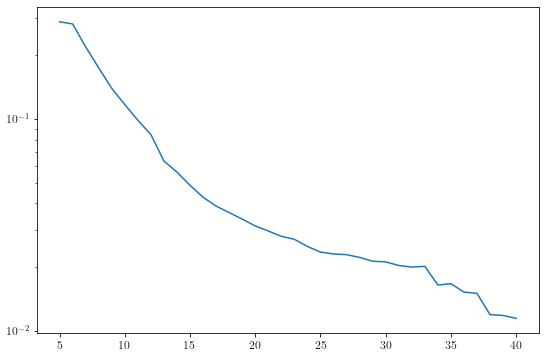

In [4]:
plt.rcParams['figure.figsize'] = [9, 6]
plt.rcParams.update({'font.size': 12})


plt.errorbar(rdimAr, scans[0], yerr=scans[1])
plt.show()

plt.errorbar(rdimAr, scans[2], yerr=scans[3])
plt.show()

plt.plot(rdimAr, scans[4], label='std')
plt.plot(rdimAr, scans[5], label='max')
plt.legend()
plt.show()


plt.semilogy(rdimAr, scans[2])
plt.show()

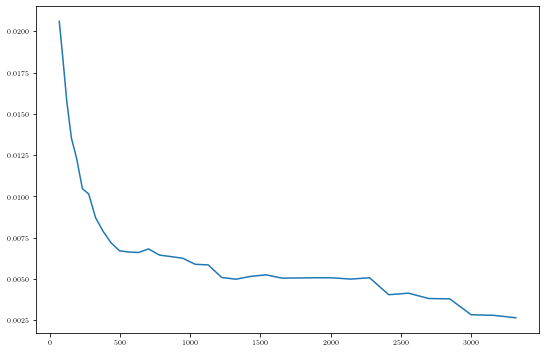

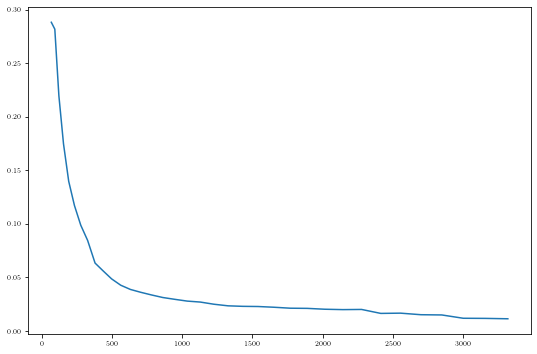

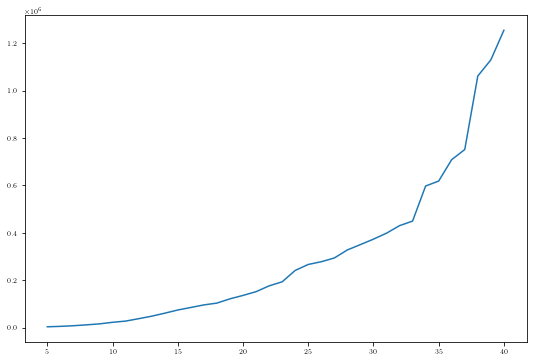

In [64]:



plt.plot(fdimAr,scans[0])
plt.show()

plt.plot(fdimAr,scans[2])
plt.show()

plt.plot(rdimAr,fdimAr/scans[0])
plt.show()

# plt.semilogy(rdimAr,scans[0]/fdimAr)
# plt.show()
